In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import unet
from unet import utils
from unet.datasets import circles

In [2]:
unet_model = unet.build_model(channels=circles.channels,
                              num_classes=circles.classes,
                              layer_depth=3,
                              filters_root=16)
unet.finalize_model(unet_model)

In [3]:
train_dataset, validation_dataset = circles.load_data(100, nx=200, ny=200, splits=(0.7, 0.3))

In [4]:
trainer = unet.Trainer(checkpoint_callback=False)
trainer.fit(unet_model,
            train_dataset,
            validation_dataset,
            epochs=5,
            batch_size=1)

Train for 70 steps, validate for 30 steps
Epoch 1/5
70/70 [==============================] - 25s 360ms/step - loss: 0.3319 - categorical_crossentropy: 0.3319 - categorical_accuracy: 0.9392 - mean_iou: 0.4215 - dice_coefficient: 0.8170 - auc: 0.9450 - val_loss: 0.2902 - val_categorical_crossentropy: 0.2902 - val_categorical_accuracy: 0.9549 - val_mean_iou: 0.4026 - val_dice_coefficient: 0.7669 - val_auc: 0.9812
Epoch 2/5
70/70 [==============================] - 26s 365ms/step - loss: 0.1421 - categorical_crossentropy: 0.1421 - categorical_accuracy: 0.9535 - mean_iou: 0.5389 - dice_coefficient: 0.9259 - auc: 0.9857 - val_loss: 0.0825 - val_categorical_crossentropy: 0.0825 - val_categorical_accuracy: 0.9549 - val_mean_iou: 0.5937 - val_dice_coefficient: 0.9447 - val_auc: 0.9954
Epoch 3/5
70/70 [==============================] - 26s 378ms/step - loss: 0.1122 - categorical_crossentropy: 0.1122 - categorical_accuracy: 0.9535 - mean_iou: 0.5815 - dice_coefficient: 0.9398 - auc: 0.9904 - val_l

In [5]:
prediction = unet_model.predict(validation_dataset.batch(batch_size=3))

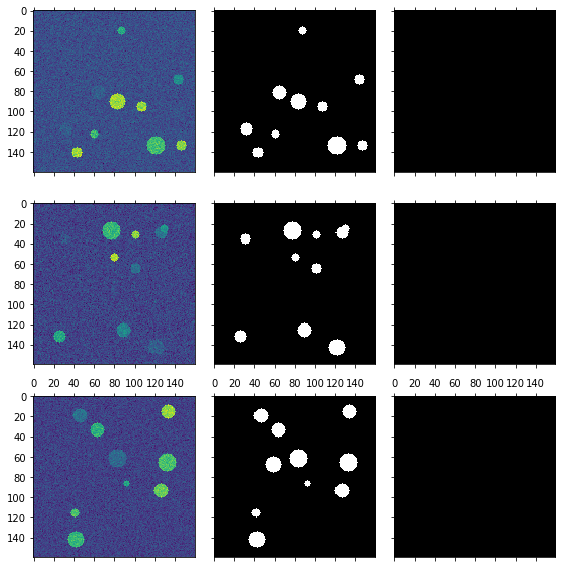

In [14]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8,8))
dataset = validation_dataset.map(utils.crop_image_and_label_to_shape(prediction.shape[1:]))

for i, (image, label) in enumerate(dataset.take(3)):
    ax[i][0].matshow(image[..., -1])
    ax[i][1].matshow(np.argmax(label, axis=-1), cmap=plt.cm.gray)
    ax[i][2].matshow(np.argmax(prediction[i,...], axis=-1), cmap=plt.cm.gray)
plt.tight_layout()
